In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
#import matplotlib.pyplot as plt

---------------------------

## Config

In [3]:
import sys

In [4]:
project_dir = '/home/pmonteagudo/workspace/silencing_project'
if project_dir not in sys.path: 
    sys.path.append(project_dir)
from config_analysis import *

In [5]:
pd.options.mode.chained_assignment = None

In [6]:
import Util

- Result **directories**

In [7]:
#annot_dir = '/data/parastou/RNAdeg/annotation/'
#annot_dir = os.path.join(project_data_dir, 'annotation/gff')
annot_dir = os.path.join(project_data_dir, 'annotation/gff_v2')

---------------------------

- reference `GTF/GFF` **file**

In [8]:
## - Parastous:
#in_gff = os.path.join(annot_dir, 'schizosaccharomyces_pombe.chr.extended.gff3')

## - sPomBase:
in_gff = os.path.join(annot_dir, 'Schizosaccharomyces_pombe_all_chromosomes.extended.gff3')
#in_gff = os.path.join(annot_dir, 'Schizosaccharomyces_pombe_all_chromosomes.extended_with_mat_locus.gff3') ## include MAT1, MAT2, MAT3

## - Ensembl:
#in_gff = os.path.join(annot_dir, 'Schizosaccharomyces_pombe.ASM294v2.45.gff3')

- Heterochromatic Features (**repeats**) `GTF/GFF` **file**

In [9]:
in_repeats = os.path.join(annot_dir, 'repeats_subtel.gff3')

---------------------------

# Explore `GFF` 

- Load `GFF` **File** as **DataFrame**: `schizosaccharomyces_pombe.chr.extended.gff3`

In [10]:
gff_header = ['seqid', 'source', 'type', 'start', 'end', 'score', 'strand', 'phase', 'attributes']

In [11]:
gff = pd.read_csv(in_gff, sep='\t', comment='#', names=gff_header)

In [12]:
## Parse `attributes` colummn
attributes_df = gff['attributes'].apply(lambda x: Util.parse_attribute_col(x))
#attributes_df = attributes_df.apply(pd.Series) # slower

attributes_df = pd.DataFrame(attributes_df.values.tolist(), index=gff.index)
gff = pd.concat([gff.drop('attributes', axis=1), attributes_df], axis=1)

- Attribute Columns:

In [13]:
attribute_columns = gff.columns.difference(gff_header)
attribute_columns

Index(['ID', 'Name', 'Parent'], dtype='object')

In [14]:
attribute_columns = gff.columns.difference(gff_header)
attribute_columns

Index(['ID', 'Name', 'Parent'], dtype='object')

In [15]:
gff.head()

,seqid,source,type,start,end,score,strand,phase,ID,Name,Parent
0,I,PomBase,gene,1798347,1799015,.,+,.,SPAC1002.01,mrx11,NaN
1,I,PomBase,mRNA,1798347,1799015,.,+,.,SPAC1002.01.1,NaN,SPAC1002.01
2,I,PomBase,CDS,1798347,1798830,.,+,.,SPAC1002.01.1:exon:1,NaN,SPAC1002.01.1
3,I,PomBase,intron,1798831,1798959,.,+,.,SPAC1002.01.1:intron:1,NaN,SPAC1002.01.1
4,I,PomBase,CDS,1798960,1799015,.,+,.,SPAC1002.01.1:exon:2,NaN,SPAC1002.01.1


In [16]:
gff.shape

(41755, 11)

In [ ]:
trna_df = gff[gff['type'] == 'tRNA']
trna_df['feature_length'] = trna_df['end'] - trna_df['start'] + 1
trna_df.sort_values('feature_length', ascending=False)

In [24]:
# tRNA features are extremely small
trna_df['feature_length'].sum() # total length 15kb

15084

In [25]:
rrna_df = gff[gff['type'] == 'rRNA']
rrna_df['feature_length'] = rrna_df['end'] - rrna_df['start'] + 1
rrna_df.sort_values('feature_length', ascending=False)

,seqid,source,type,start,end,score,strand,phase,ID,Name,Parent,feature_length
40975,III,PomBase,rRNA,2443713,2447197,.,+,.,SPRRNA.49.1,NaN,SPRRNA.49,3485
40972,III,PomBase,rRNA,16927,20411,.,-,.,SPRRNA.48.1,NaN,SPRRNA.48,3485
40969,III,PomBase,rRNA,6057,9541,.,-,.,SPRRNA.47.1,NaN,SPRRNA.47,3485
40849,mitochondrial,PomBase,rRNA,1,2822,.,+,.,SPRRNA.01.1,NaN,SPRRNA.01,2822
40966,III,PomBase,rRNA,2440994,2442835,.,+,.,SPRRNA.46.1,NaN,SPRRNA.46,1842
40960,III,PomBase,rRNA,21289,23130,.,-,.,SPRRNA.44.1,NaN,SPRRNA.44,1842
40957,III,PomBase,rRNA,10419,12260,.,-,.,SPRRNA.43.1,NaN,SPRRNA.43,1842
40852,mitochondrial,PomBase,rRNA,3131,4552,.,+,.,SPRRNA.02.1,NaN,SPRRNA.02,1422
40954,III,PomBase,rRNA,1,1390,.,-,.,SPRRNA.42.1,NaN,SPRRNA.42,1390
40963,III,PomBase,rRNA,2451883,2452883,.,+,.,SPRRNA.45.1,NaN,SPRRNA.45,1001


A **non-coding RNA** (`ncRNA`) is an RNA molecule that **is not `translated` into a protein**. The **DNA sequence** from which a functional non-coding RNA is `transcribed` is often called **an RNA gene**. 

Abundant and functionally important types of non-coding RNAs include:

* **transfer RNAs** (`tRNAs`)
* **ribosomal RNAs** (`rRNAs`)

as well as small RNAs such as: 

* **Small nucleolar RNAs** (`snoRNAs`) 
* **Small nuclear RNA** (`snRNA`)
* microRNAs (`miRNA`)
* Small interfering RNA (`siRNA`)
* Piwi-interacting RNA (`piRNA`) 


For all these **non-coding RNA** `gene` features (except for the actual `ncRNA_gene` and `tRNA_gene`), the corresponding `transcript` features are **NOT** found under `transcript`. Instead, they can be found in their own corresponding category:
- snRNA_gene -> snRNA
- rRNA_gene -> rRNA
- snoRNA_gene -> snoRNA

Additionally, for **pseudogenes** (`56`) both `gene` and `transcript` features can be found under the `pseudogene` category:
- `28` of the `56` **pseudogenes** behave as `transcripts` (e.g. contain a `Parent`, no `gene_id`, contain a `transcript_id`)
- the other `28` **pseudogenes** behave as `genes` (e.g. contain no `Parent`, a `gene_id`, no `transcript_id`)

In [17]:
gff_by_type = gff[['type', 'ID']].groupby(['type']).count()
gff_by_type.sort_values('ID')

,ID
type,
polyA_signal_sequence,1
mating_type_region,1
SNP,2
TR_box,2
regional_centromere,3
regional_centromere_central_core,4
gap,4
gene_group,5
snRNA,6


In [19]:
sum(gff_by_type.ID)

41755

Interestingly, in this `gff` there are annotated **features** that might be of importance:

!['spombe_chr'](https://cshperspectives.cshlp.org/content/7/7/a018770/F2.large.jpg)

!['spombe_chr'](https://ars.els-cdn.com/content/image/1-s2.0-S0014579315004652-gr1.jpg)

In [20]:
features = ['mating_type_region', 'regional_centromere', 'regional_centromere_central_core',
            'regional_centromere_inner_repeat_region', 'dg_repeat', 'dh_repeat', 'repeat_region', 'long_terminal_repeat']

In [21]:
#features

In [22]:
#feature_df = gff[gff['type'].isin(features)]
#feature_df = gff[gff['type'].isin(['dh_repeat'])].sort_values(['seqid','start', 'end'])
feature_df = gff[gff['type'].isin(['dg_repeat'])].sort_values(['seqid','start', 'end'])

feature_df

,seqid,source,type,start,end,score,strand,phase,ID,Name,Parent
41362,I,PomBase,dg_repeat,3759165,3763441,.,+,.,SPRPTCENA.4,NaN,NaN
41668,I,PomBase,dg_repeat,3777115,3778839,.,+,.,SPRPTCENA.8,NaN,NaN
41430,II,PomBase,dg_repeat,1604786,1609649,.,-,.,SPRPTCENB.1,NaN,NaN
41383,II,PomBase,dg_repeat,1638230,1644747,.,+,.,SPRPTCENB.17,NaN,NaN
41685,III,PomBase,dg_repeat,1076115,1078499,.,+,.,SPRPTCENC.2,NaN,NaN
41202,III,PomBase,dg_repeat,1082876,1083348,.,+,.,SPRPTCENC.5,NaN,NaN
41517,III,PomBase,dg_repeat,1084748,1087132,.,+,.,SPRPTCENC.7,NaN,NaN
41629,III,PomBase,dg_repeat,1111813,1114198,.,+,.,SPRPTCENC.18,NaN,NaN
41444,III,PomBase,dg_repeat,1118573,1120957,.,+,.,SPRPTCENC.21,NaN,NaN
41583,III,PomBase,dg_repeat,1125333,1125582,.,+,.,SPRPTCENC.24,NaN,NaN


---------------------------

# Add `length` and `Category` Information

Because in the new `gtf` we are using the `CDS` **features**, as oposed to the old `gtf` where had `exon` **features**, the lengths of the `gene`'s differ between the two.

To recover the same lengths, it should be enough to add the corresponding **three_prime_UTR** and **five_prime_UTR** lengths, to the lengths obtained from `CDS` **features**

**Remember:** `exon` = `CDS` + `UTR` 

## **`CDS`s**: `12162`

This `gff` contains no **exon** features instead we start by looking at the **CDS** features

The **coding region of a gene**, also known as the `CDS` (from **coding sequence**), is the portion of a gene's DNA or RNA that codes for protein.

Although this term is also sometimes used interchangeably with **exon**, it is not the exact same thing: the **exon** is composed of the **coding region** (`CDS`) as well as the **3' and 5' untranslated regions** of the RNA, and so therefore, an exon would be partially made up of coding regions.

- Get the `cds_df` filtering by **CDS** the `type` **Column**

In [23]:
cds_df = gff[gff['type'].str.contains('CDS')]

- Filter `columns` that contain **all NaN's**

In [24]:
cols = cds_df.columns[~cds_df.isna().all()]
cds_df = cds_df[cols]
#cds_df

- Add `length` **Column** to the `exon_df`: 

In [25]:
## compute exon lengths: end - start + 1
cds_df['cds_length'] = cds_df['end'] - cds_df['start'] + 1

- Get corresponding `transcript_id`s from the `Parent` **Column**

In [26]:
## used the `Parent` to get the `transcript_id` attribute
#cds_df['transcript_id'] = cds_df['Parent'].apply(lambda x: x.split(':')[1])
cds_df['transcript_id'] = cds_df['Parent']

In [27]:
## check every `transcript` has an associated `transcript_id`
assert not any(cds_df['transcript_id'].isnull())

In [28]:
cds_df.head()

,seqid,source,type,start,end,score,strand,phase,ID,Parent,cds_length,transcript_id
2,I,PomBase,CDS,1798347,1798830,.,+,.,SPAC1002.01.1:exon:1,SPAC1002.01.1,484,SPAC1002.01.1
4,I,PomBase,CDS,1798960,1799015,.,+,.,SPAC1002.01.1:exon:2,SPAC1002.01.1,56,SPAC1002.01.1
8,I,PomBase,CDS,1799128,1799817,.,+,.,SPAC1002.02.1:exon:1,SPAC1002.02.1,690,SPAC1002.02.1
13,I,PomBase,CDS,1800212,1802983,.,-,.,SPAC1002.03c.1:exon:1,SPAC1002.03c.1,2772,SPAC1002.03c.1
18,I,PomBase,CDS,1803773,1804372,.,-,.,SPAC1002.04c.1:exon:1,SPAC1002.04c.1,600,SPAC1002.04c.1


In [29]:
cds_df.shape

(12162, 12)

- Get `transcript_cds_lengths_df`: **summarize** `cds_df` by `transcript_id` and **sum** over individual `cds_length`s

Each `transcript` is associated to one or more `exons`, in this case `CDS`. This defines properly the **length** of an `transcript` as: the sum of exon (`CDS`) length's associated to that transcript.

In [30]:
transcript_cds_lengths_df = cds_df[['transcript_id', 'cds_length']].groupby('transcript_id').sum().reset_index()

In [31]:
transcript_cds_lengths_df

,transcript_id,cds_length
0,SPAC1002.01.1,540
1,SPAC1002.02.1,690
2,SPAC1002.03c.1,2772
3,SPAC1002.04c.1,600
4,SPAC1002.05c.1,2148
...,...,...
7000,dg1a.1,3501
7001,dg1b.1,3501
7002,dh1a.1,4001
7003,dh1b.1,4001


In [32]:
transcript_cds_lengths_df.shape

(7005, 2)

- List containing all `transcript_ids` present in the `cds_df`

In [33]:
transcript_ids = transcript_cds_lengths_df['transcript_id'].unique()
len(transcript_ids)

7005

## **`UTR`'s**: `9654`

In molecular genetics, an **untranslated region** (or `UTR`) refers to either of two sections, one on each side of a **coding sequence** (`CDS`) on a strand of **mRNA**.
* If it is found on the **5' side, it is called the 5' UTR (or leader sequence)**.
* If it is found on the **3' side, it is called the 3' UTR (or trailer sequence)**.

**mRNA** is RNA that carries information from DNA to the ribosome, the site of protein synthesis (translation) within a cell. The mRNA is initially transcribed from the corresponding DNA sequence and then translated into protein. However, several regions of the mRNA are usually not translated into protein, **including the 5' and 3' UTRs**.

Although they are called untranslated regions, and do not form the protein-coding region of the gene, uORFs located within the 5' UTR can be translated into peptides

- Get the `utr_df` filtering by **three_prime_UTR** and **five_prime_UTR** the `type` **Column**

In [34]:
utr_features = ['three_prime_UTR', 'five_prime_UTR']

In [35]:
utr_df = gff[gff['type'].isin(utr_features)]
utr_df

,seqid,source,type,start,end,score,strand,phase,ID,Name,Parent
7,I,PomBase,five_prime_UTR,1799061,1799127,.,+,.,SPAC1002.02.1:five_prime_UTR:1,NaN,SPAC1002.02.1
9,I,PomBase,three_prime_UTR,1799818,1800053,.,+,.,SPAC1002.02.1:three_prime_UTR:1,NaN,SPAC1002.02.1
12,I,PomBase,five_prime_UTR,1802984,1803141,.,-,.,SPAC1002.03c.1:five_prime_UTR:1,NaN,SPAC1002.03c.1
14,I,PomBase,three_prime_UTR,1799915,1800211,.,-,.,SPAC1002.03c.1:three_prime_UTR:1,NaN,SPAC1002.03c.1
17,I,PomBase,five_prime_UTR,1804373,1804491,.,-,.,SPAC1002.04c.1:five_prime_UTR:1,NaN,SPAC1002.04c.1
...,...,...,...,...,...,...,...,...,...,...,...
35952,III,PomBase,five_prime_UTR,708064,708196,.,+,.,SPCPJ732.03.1:five_prime_UTR:1,NaN,SPCPJ732.03.1
35954,III,PomBase,five_prime_UTR,708330,708339,.,+,.,SPCPJ732.03.1:five_prime_UTR:2,NaN,SPCPJ732.03.1
35960,III,PomBase,three_prime_UTR,708891,709145,.,+,.,SPCPJ732.03.1:three_prime_UTR:1,NaN,SPCPJ732.03.1
36243,mating_type_region,PomBase,five_prime_UTR,3711,3753,.,-,.,SPMTR.01.1:five_prime_UTR:1,NaN,SPMTR.01.1


- Filter `columns` that contain **all NaN's**

In [36]:
cols = utr_df.columns[~utr_df.isna().all()]
utr_df = utr_df[cols]
#utr_df

- Add `length` **Column** to the `utr_df`: 

In [37]:
## compute exon lengths: end - start + 1
utr_df['utr_length'] = utr_df['end'] - utr_df['start'] + 1

- Get corresponding `transcript_id`s from the `Parent` **Column**

In [38]:
## used the `Parent` to get the `transcript_id` attribute
#utr_df['transcript_id'] = utr_df['Parent'].apply(lambda x: x.split(':')[1])
utr_df['transcript_id'] = utr_df['Parent']

In [39]:
## check every `transcript` has an associated `transcript_id`
assert not any(utr_df['transcript_id'].isnull())

In [40]:
utr_df.head()

,seqid,source,type,start,end,score,strand,phase,ID,Parent,utr_length,transcript_id
7,I,PomBase,five_prime_UTR,1799061,1799127,.,+,.,SPAC1002.02.1:five_prime_UTR:1,SPAC1002.02.1,67,SPAC1002.02.1
9,I,PomBase,three_prime_UTR,1799818,1800053,.,+,.,SPAC1002.02.1:three_prime_UTR:1,SPAC1002.02.1,236,SPAC1002.02.1
12,I,PomBase,five_prime_UTR,1802984,1803141,.,-,.,SPAC1002.03c.1:five_prime_UTR:1,SPAC1002.03c.1,158,SPAC1002.03c.1
14,I,PomBase,three_prime_UTR,1799915,1800211,.,-,.,SPAC1002.03c.1:three_prime_UTR:1,SPAC1002.03c.1,297,SPAC1002.03c.1
17,I,PomBase,five_prime_UTR,1804373,1804491,.,-,.,SPAC1002.04c.1:five_prime_UTR:1,SPAC1002.04c.1,119,SPAC1002.04c.1


In [41]:
utr_df.shape

(9654, 12)

- Get `transcript_utr_lengths_df`: **summarize** `utr_df` by `transcript_id` and **sum** over individual `utr_length`s

Each `transcript` is associated to two or less `utr`, we can properly the define the **length** of a `transcript_utrs` as: the sum of individual `utr` length's associated to that transcript.

In [42]:
transcript_utr_lengths_df = utr_df[['transcript_id', 'utr_length']].groupby('transcript_id').sum().reset_index()

In [43]:
transcript_utr_lengths_df

,transcript_id,utr_length
0,SPAC1002.02.1,303
1,SPAC1002.03c.1,455
2,SPAC1002.04c.1,268
3,SPAC1002.05c.1,102
4,SPAC1002.07c.1,438
...,...,...
4852,SPCPJ732.01.1,536
4853,SPCPJ732.02c.1,712
4854,SPCPJ732.03.1,398
4855,SPMTR.01.1,43


In [44]:
transcript_utr_lengths_df.shape

(4857, 2)

- List containing all `transcript_ids` present in the `utr_df`

In [45]:
utr_transcript_ids = transcript_utr_lengths_df['transcript_id'].tolist()
len(utr_transcript_ids)

4857

## **`Transcript`s**: `7005`

- Get `transcript_df` by filtering the **gff** for `transcript_id`s present in the `cds_df`

In [46]:
#transcript_df = gff[gff['transcript_id'].isin(transcript_ids)]
transcript_df = gff[gff['ID'].isin(transcript_ids)]
transcript_df.shape

(7005, 11)

- Filter `columns` that contain **all NaN's**

In [47]:
cols = transcript_df.columns[~transcript_df.isna().all()]
transcript_df = transcript_df[cols]
transcript_df

,seqid,source,type,start,end,score,strand,phase,ID,Parent
1,I,PomBase,mRNA,1798347,1799015,.,+,.,SPAC1002.01.1,SPAC1002.01
6,I,PomBase,mRNA,1799061,1800053,.,+,.,SPAC1002.02.1,SPAC1002.02
11,I,PomBase,mRNA,1799915,1803141,.,-,.,SPAC1002.03c.1,SPAC1002.03c
16,I,PomBase,mRNA,1803624,1804491,.,-,.,SPAC1002.04c.1,SPAC1002.04c
21,I,PomBase,mRNA,1804548,1806797,.,-,.,SPAC1002.05c.1,SPAC1002.05c
...,...,...,...,...,...,...,...,...,...,...
41741,I,PomBase,pseudogenic_transcript,5726,6331,.,+,.,SPAC212.10b.1,SPAC212.10b
41744,I,PomBase,mRNA,3761000,3764500,.,-,.,dg1b.1,dg1b
41747,I,PomBase,mRNA,3761000,3764500,.,+,.,dg1a.1,dg1a
41750,I,PomBase,mRNA,3753000,3757000,.,-,.,dh1b.1,dh1b


- Get corresponding `transcript_id`s from the `ID` **Column**

In [48]:
## use the `ID` to get the `transcript_id` attribute
transcript_df['transcript_id'] = transcript_df['ID']

- Add `cds_length` **Column** to the `transcript_df`: **merge** `transcript_cds_lengths_df` to `transcript_df`

In [49]:
transcript_df = transcript_df.merge(transcript_cds_lengths_df, on='transcript_id')
#transcript_df

- Add `utr_length` **Column** to the `transcript_df`: **merge** `transcript_utr_lengths_df` to `transcript_df`

In [50]:
transcript_df = transcript_df.merge(transcript_utr_lengths_df, on='transcript_id', how='outer')
#transcript_df

- Get corresponding `gene_id` from the `Parent` **Column**

In [51]:
## used the `Parent` to get the `gene_id` attribute
#transcript_df['gene_id'] = transcript_df['Parent'].apply(lambda x: x.split(':')[1])
transcript_df['gene_id'] = transcript_df['Parent']

In [52]:
## check every `transcript` has an associated `gene-id`
assert not any(transcript_df['gene_id'].isnull())

In [53]:
transcript_df.head()

,seqid,source,type,start,end,score,strand,phase,ID,Parent,transcript_id,cds_length,utr_length,gene_id
0,I,PomBase,mRNA,1798347,1799015,.,+,.,SPAC1002.01.1,SPAC1002.01,SPAC1002.01.1,540,NaN,SPAC1002.01
1,I,PomBase,mRNA,1799061,1800053,.,+,.,SPAC1002.02.1,SPAC1002.02,SPAC1002.02.1,690,303.0,SPAC1002.02
2,I,PomBase,mRNA,1799915,1803141,.,-,.,SPAC1002.03c.1,SPAC1002.03c,SPAC1002.03c.1,2772,455.0,SPAC1002.03c
3,I,PomBase,mRNA,1803624,1804491,.,-,.,SPAC1002.04c.1,SPAC1002.04c,SPAC1002.04c.1,600,268.0,SPAC1002.04c
4,I,PomBase,mRNA,1804548,1806797,.,-,.,SPAC1002.05c.1,SPAC1002.05c,SPAC1002.05c.1,2148,102.0,SPAC1002.05c


In [54]:
transcript_df.shape

(7005, 14)

- Have a look at distribution of **feature** `types`:

In [55]:
transcripts_df_by_type = transcript_df[['type', 'ID']].groupby(['type']).count()
transcripts_df_by_type.sort_values('ID')

,ID
type,
snRNA,6
pseudogenic_transcript,29
rRNA,49
snoRNA,57
tRNA,196
ncRNA,1528
mRNA,5140


In [56]:
sum(transcripts_df_by_type.ID)

7005

- List containing all `gene_ids`:

In [57]:
gene_ids = transcript_df['gene_id'].unique().tolist()
len(gene_ids)

7005

## **`Gene`s**

- Get `gene_df` by filtering the **gff** for `gene_id`s present in the `transcript_df`

In [58]:
#gene_df = gff[gff['gene_id'].isin(gene_ids)]
gene_df = gff[gff['ID'].isin(gene_ids)]
gene_df.shape
#gene_df

(7005, 11)

- Filter `columns` that contain **all NaN's**

In [59]:
cols = gene_df.columns[~gene_df.isna().all()]
gene_df = gene_df[cols]
gene_df

,seqid,source,type,start,end,score,strand,phase,ID,Name
0,I,PomBase,gene,1798347,1799015,.,+,.,SPAC1002.01,mrx11
5,I,PomBase,gene,1799061,1800053,.,+,.,SPAC1002.02,pom34
10,I,PomBase,gene,1799915,1803141,.,-,.,SPAC1002.03c,gls2
15,I,PomBase,gene,1803624,1804491,.,-,.,SPAC1002.04c,taf11
20,I,PomBase,gene,1804548,1806797,.,-,.,SPAC1002.05c,jmj2
...,...,...,...,...,...,...,...,...,...,...
41740,I,PomBase,gene,5726,6331,.,+,.,SPAC212.10b,SPAC212.10_plus
41743,I,PomBase,gene,3761000,3764500,.,-,.,dg1b,dg1_minus
41746,I,PomBase,gene,3761000,3764500,.,+,.,dg1a,dg1_plus
41749,I,PomBase,gene,3753000,3757000,.,-,.,dh1b,dh1_minus


- Because not all genes contain a `Name` category, we can't use this as an identifier but this are not real NaNs, we fix this to resolve future issues:

In [60]:
gene_df['Name'] = gene_df['Name'].fillna('not_defined')

- Get corresponding `transcript_id`s from the `ID` **Column**

In [61]:
## use the `ID` to get the `gene_id` attribute
gene_df['gene_id'] = gene_df['ID']

Each `gene` is associated to one and only one `transcript`. This defines properly the **length** of a `gene` as: the length of the associated transcript (e.g. the sum of exon length's of the associated transcript).

- Add `cds_length` and `utr_length` **Column**s to the `gene_df`: **merge** `transcripts_df` to `gene_df`

In [62]:
#gene_df = gene_df.drop('type', axis=1).merge(transcript_df[['gene_id', 'cds_length', 'utr_length', 'type']], on='gene_id')
gene_df = gene_df.merge(transcript_df[['gene_id', 'cds_length', 'utr_length', 'type']].rename(columns={'type':'bio_type'}), on='gene_id')
gene_df

,seqid,source,type,start,end,score,strand,phase,ID,Name,gene_id,cds_length,utr_length,bio_type
0,I,PomBase,gene,1798347,1799015,.,+,.,SPAC1002.01,mrx11,SPAC1002.01,540,NaN,mRNA
1,I,PomBase,gene,1799061,1800053,.,+,.,SPAC1002.02,pom34,SPAC1002.02,690,303.0,mRNA
2,I,PomBase,gene,1799915,1803141,.,-,.,SPAC1002.03c,gls2,SPAC1002.03c,2772,455.0,mRNA
3,I,PomBase,gene,1803624,1804491,.,-,.,SPAC1002.04c,taf11,SPAC1002.04c,600,268.0,mRNA
4,I,PomBase,gene,1804548,1806797,.,-,.,SPAC1002.05c,jmj2,SPAC1002.05c,2148,102.0,mRNA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7000,I,PomBase,gene,5726,6331,.,+,.,SPAC212.10b,SPAC212.10_plus,SPAC212.10b,606,NaN,pseudogenic_transcript
7001,I,PomBase,gene,3761000,3764500,.,-,.,dg1b,dg1_minus,dg1b,3501,NaN,mRNA
7002,I,PomBase,gene,3761000,3764500,.,+,.,dg1a,dg1_plus,dg1a,3501,NaN,mRNA
7003,I,PomBase,gene,3753000,3757000,.,-,.,dh1b,dh1_minus,dh1b,4001,NaN,mRNA


In [63]:
gene_df.shape

(7005, 14)

- Add `gene_length` **Column** to the `gene_df`: 

In [64]:
gene_df['gene_length'] = gene_df[["cds_length", "utr_length"]].sum(axis=1)
gene_df

,seqid,source,type,start,end,score,strand,phase,ID,Name,gene_id,cds_length,utr_length,bio_type,gene_length
0,I,PomBase,gene,1798347,1799015,.,+,.,SPAC1002.01,mrx11,SPAC1002.01,540,NaN,mRNA,540.0
1,I,PomBase,gene,1799061,1800053,.,+,.,SPAC1002.02,pom34,SPAC1002.02,690,303.0,mRNA,993.0
2,I,PomBase,gene,1799915,1803141,.,-,.,SPAC1002.03c,gls2,SPAC1002.03c,2772,455.0,mRNA,3227.0
3,I,PomBase,gene,1803624,1804491,.,-,.,SPAC1002.04c,taf11,SPAC1002.04c,600,268.0,mRNA,868.0
4,I,PomBase,gene,1804548,1806797,.,-,.,SPAC1002.05c,jmj2,SPAC1002.05c,2148,102.0,mRNA,2250.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7000,I,PomBase,gene,5726,6331,.,+,.,SPAC212.10b,SPAC212.10_plus,SPAC212.10b,606,NaN,pseudogenic_transcript,606.0
7001,I,PomBase,gene,3761000,3764500,.,-,.,dg1b,dg1_minus,dg1b,3501,NaN,mRNA,3501.0
7002,I,PomBase,gene,3761000,3764500,.,+,.,dg1a,dg1_plus,dg1a,3501,NaN,mRNA,3501.0
7003,I,PomBase,gene,3753000,3757000,.,-,.,dh1b,dh1_minus,dh1b,4001,NaN,mRNA,4001.0


- Load **repeats** `GTF/GFF` **file** as `gdf`

In [65]:
repeat_df = pd.read_csv(in_repeats, sep='\t', comment='#', names=gff_header)

In [66]:
## Parse `attributes` colummn
attributes_df = repeat_df['attributes'].apply(lambda x: Util.parse_attribute_col(x))
attributes_df = pd.DataFrame(attributes_df.values.tolist(), index=repeat_df.index)
repeat_df = pd.concat([repeat_df.drop('attributes', axis=1), attributes_df], axis=1)

In [67]:
repeat_df[['ID', 'type']].groupby('type').count()

,ID
type,
CDS,32
five_prime_UTR,7
gene,27
intron,5
mRNA,21
ncRNA,1
pseudogenic_transcript,5
three_prime_UTR,7


- Get `gene` **features** by selecting those entries without a `Parent`

In [68]:
repeat_df = repeat_df[repeat_df['Parent'].isnull()]
repeat_df

,seqid,source,type,start,end,score,strand,phase,ID,Name,Parent
0,I,PomBase,gene,1,5662,.,-,.,SPAC212.11,tlh1,NaN
3,I,PomBase,gene,5726,6331,.,-,.,SPAC212.10,NaN,NaN
6,I,PomBase,gene,7619,9274,.,+,.,SPAC212.09c,NaN,NaN
9,I,PomBase,gene,11027,11556,.,-,.,SPNCRNA.70,NaN,NaN
12,I,PomBase,gene,11784,12994,.,+,.,SPAC212.08c,NaN,NaN
16,I,PomBase,gene,13665,14555,.,+,.,SPAC212.07c,NaN,NaN
19,I,PomBase,gene,15855,16226,.,+,.,SPAC212.12,NaN,NaN
22,I,PomBase,gene,18042,18974,.,+,.,SPAC212.06c,NaN,NaN
29,I,PomBase,gene,20824,21015,.,+,.,SPAC212.05c,NaN,NaN
32,I,PomBase,gene,21381,23050,.,+,.,SPAC212.04c,NaN,NaN


In [69]:
repeat_df.shape

(27, 11)

- Get list of **repeat** `gene_id`'s

In [70]:
repeat_names = list(repeat_df['ID'])
#repeat_names = list(repeat_df['Name'])
#repeat_names

In [71]:
len(set(repeat_names))

27

- Add `category` column to `gene_df`

In [72]:
gene_df['category'] = gene_df[['gene_id', 'Name']].apply(lambda row: Util.get_category(row['gene_id'], row['Name'], repeat_names), axis=1)

In [73]:
gene_df

,seqid,source,type,start,end,score,strand,phase,ID,Name,gene_id,cds_length,utr_length,bio_type,gene_length,category
0,I,PomBase,gene,1798347,1799015,.,+,.,SPAC1002.01,mrx11,SPAC1002.01,540,NaN,mRNA,540.0,gene
1,I,PomBase,gene,1799061,1800053,.,+,.,SPAC1002.02,pom34,SPAC1002.02,690,303.0,mRNA,993.0,gene
2,I,PomBase,gene,1799915,1803141,.,-,.,SPAC1002.03c,gls2,SPAC1002.03c,2772,455.0,mRNA,3227.0,gene
3,I,PomBase,gene,1803624,1804491,.,-,.,SPAC1002.04c,taf11,SPAC1002.04c,600,268.0,mRNA,868.0,gene
4,I,PomBase,gene,1804548,1806797,.,-,.,SPAC1002.05c,jmj2,SPAC1002.05c,2148,102.0,mRNA,2250.0,gene
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7000,I,PomBase,gene,5726,6331,.,+,.,SPAC212.10b,SPAC212.10_plus,SPAC212.10b,606,NaN,pseudogenic_transcript,606.0,repeat
7001,I,PomBase,gene,3761000,3764500,.,-,.,dg1b,dg1_minus,dg1b,3501,NaN,mRNA,3501.0,repeat
7002,I,PomBase,gene,3761000,3764500,.,+,.,dg1a,dg1_plus,dg1a,3501,NaN,mRNA,3501.0,repeat
7003,I,PomBase,gene,3753000,3757000,.,-,.,dh1b,dh1_minus,dh1b,4001,NaN,mRNA,4001.0,repeat


In [74]:
gene_df.shape

(7005, 16)

In [75]:
#set(gene_df[gene_df['category'] == 'repeat']['ID']).symmetric_difference(repeat_names)

- Have a look at distribution of **feature** `category`:

In [76]:
gene_df_by_type = gene_df[['category', 'ID']].groupby(['category']).count()
gene_df_by_type.sort_values('ID')

,ID
category,
repeat,24
ribosomal,177
gene,6804


In [77]:
sum(gene_df_by_type.ID)

7005

- Have a look at distribution of **feature** `types`:

In [78]:
gene_df_by_type = gene_df[['type', 'ID']].groupby(['type']).count()
gene_df_by_type.sort_values('ID')

,ID
type,
gene,7005


In [79]:
sum(gene_df_by_type.ID)

7005

In [80]:
#transcripts_df_by_type

In [81]:
#gff_by_type.index.difference(gene_df_by_type.index.union(transcripts_df_by_type.index)).tolist()

## Store **Gene Table Annotation's** (gdf)

These are individual `.csv` **files** that contain information about associated **features**:
- **genes**
- **exons** (missing, for now use both `cds` and `utr`)
- **CDS**
- **UTRs**
- **Introns** (missing, but might be necesary for further analysis)

Besides the `gene_df`, I'm not sure if we need the rest ... At least for the `gene_counts.py` **script** we can directly parse the `gff` **file**

**Genes**

- Store `gene_df` as `.csv` **file**

In [82]:
gene_df_file = os.path.join(annot_dir, 'Schizosaccharomyces_pombe_all_chromosomes.extended.gene.csv')

In [83]:
gene_df.to_csv(gene_df_file, sep='\t', index=None)

**Exons**

- Add **gene information** and `biotype` column, and store `exons_df` as `.csv` **file** 

In [84]:
#exons_df_file = os.path.join(annot_dir, 'Schizosaccharomyces_pombe_all_chromosomes.extended.exon.csv')

In [85]:
#exons_df.to_csv(exons_df_file, sep='\t', index=None)

**CDS**

- Add **gene information** and `biotype` column, and store `cds_df` as `.csv` **file** 

In [86]:
#cds_df_file = os.path.join(annot_dir, 'Schizosaccharomyces_pombe_all_chromosomes.extended.cds.csv')

In [87]:
#cds_df.to_csv(cds_df_file, sep='\t', index=None)

**UTRs**

- Add **gene information** and `biotype` column, and store `cds_df` as `.csv` **file** 

In [88]:
#utr_df_file = os.path.join(annot_dir, 'Schizosaccharomyces_pombe_all_chromosomes.extended.utr.csv')

In [89]:
#utr_df.to_csv(utr_df_file, sep='\t', index=None)

## Compare to old GFF: `gene lengths` table from .csv file 

- Load `gene lengths` **file** as DataFrame (computed for old GFF)

In [90]:
## don't know how this was generated!
#in_lengths = os.path.join(annot_dir, 'schizosaccharomyces_pombe.gene_lengths.V2.csv')
in_lengths = os.path.join(project_data_dir, 'annotation/gff/schizosaccharomyces_pombe.chr.extended.gene.csv')

In [91]:
l_df = pd.read_csv(in_lengths, sep='\t')
#l_df

In [92]:
#l_df = l_df[['gene-id', 'length']]
l_df = l_df[['gene_id', 'length']]

## rename some columns to fit parastous definitions...
#l_df = l_df.rename(columns={"gene-id": "gene_id", "length": "length_parastou"})
l_df = l_df.rename(columns={"length": "length_old"})

In [93]:
l_df.head()

,gene_id,length_old
0,SPAC212.11,5662
1,SPAC212.10,606
2,SPAC212.09c,1656
3,SPNCRNA.70,530
4,SPAC212.08c,1211


In [94]:
l_df.shape

(6992, 2)

- **Merge** with lengths we just computed:

In [95]:
l_df = l_df.merge(gene_df[['gene_id', 'cds_length', 'utr_length', 'gene_length']], on='gene_id', how='outer')
#l_df = l_df.merge(gene_df[['gene_id', 'length']], on='gene_id', how='outer')
l_df.shape

(7024, 5)

- Add `difference` **Column**: 

In [96]:
#l_df['difference'] = abs(l_df['length_parastou'] - l_df['length'])
l_df['difference'] = abs(l_df['length_old'] - l_df['cds_length'])

In [97]:
l_df.head()

,gene_id,length_old,cds_length,utr_length,gene_length,difference
0,SPAC212.11,5662.0,5662.0,NaN,5662.0,0.0
1,SPAC212.10,606.0,606.0,NaN,606.0,0.0
2,SPAC212.09c,1656.0,1656.0,NaN,1656.0,0.0
3,SPNCRNA.70,530.0,530.0,NaN,530.0,0.0
4,SPAC212.08c,1211.0,837.0,374.0,1211.0,374.0


In [98]:
l_df.shape

(7024, 6)

- Add `total_difference` **Column**: 

In [99]:
#l_df['difference'] = abs(l_df['length_parastou'] - l_df['length'])
l_df['total_difference'] = abs(l_df['length_old'] - (l_df['gene_length'] ))

In [100]:
l_df.head()

,gene_id,length_old,cds_length,utr_length,gene_length,difference,total_difference
0,SPAC212.11,5662.0,5662.0,NaN,5662.0,0.0,0.0
1,SPAC212.10,606.0,606.0,NaN,606.0,0.0,0.0
2,SPAC212.09c,1656.0,1656.0,NaN,1656.0,0.0,0.0
3,SPNCRNA.70,530.0,530.0,NaN,530.0,0.0,0.0
4,SPAC212.08c,1211.0,837.0,374.0,1211.0,374.0,0.0


In [101]:
l_df.shape

(7024, 7)

- Investigate differences: they come from the fact that we are not including either, `five_prime_UTR` or `three_prime_UTR`

In [102]:
big_deviate_genes = ['SPAC16E8.02', 'SPAC24C9.14', 'SPAC2F3.13c', 'SPBC21B10.13c',
       'SPBC713.14c', 'SPBP4G3.02', 'SPCC13B11.02c', 'SPCC70.12c',
       'SPNCRNA.1306', 'SPNCRNA.390']

In [103]:
#l_df.sort_values('difference', ascending=False)
l_df.sort_values('total_difference', ascending=False).head(60)
#l_df[l_df['gene_id'].isin(big_deviate_genes)]

,gene_id,length_old,cds_length,utr_length,gene_length,difference,total_difference
6471,SPCC13B11.02c,3823.0,417.0,NaN,417.0,3406.0,3406.0
1734,SPAC24C9.14,4377.0,990.0,331.0,1321.0,3387.0,3056.0
6897,SPCC70.12c,3597.0,243.0,1107.0,1350.0,3354.0,2247.0
3603,SPBC713.14c,1596.0,228.0,NaN,228.0,1368.0,1368.0
1963,SPAC16E8.02,2212.0,669.0,227.0,896.0,1543.0,1316.0
4042,SPBC21B10.13c,1995.0,606.0,82.0,688.0,1389.0,1307.0
5628,SPBP4G3.02,2681.0,1362.0,186.0,1548.0,1319.0,1133.0
3301,SPNCRNA.103,667.0,1562.0,NaN,1562.0,895.0,895.0
3307,SPBC1271.09,1632.0,1587.0,515.0,2102.0,45.0,470.0
2745,SPAPB8E5.05,769.0,129.0,224.0,353.0,640.0,416.0


In [104]:
selected_genes = ['SPNCRNA.114']

In [105]:
l_df[l_df['gene_id'].isin(selected_genes)]

,gene_id,length_old,cds_length,utr_length,gene_length,difference,total_difference
5535,SPNCRNA.114,76.0,76.0,NaN,76.0,0.0,0.0


In [106]:
#min(l_df['difference'])

In [107]:
#max(l_df['difference'])

In [108]:
#l_df['difference'].value_counts()

Differences arise due to `+ 1` factor for each `exon` present in the `transcript` (also Parastou is missing a couple of genes, `nans` account for the small differences)

In [109]:
#n_exons_per_transcript = exon_df[['exon_id', 'transcript_id']].groupby('transcript_id').count()['exon_id'].value_counts()
#n_exons_per_transcript

In [110]:
#sum(n_exons_per_transcript)

- Visualize `difference`: `scatter_plot`

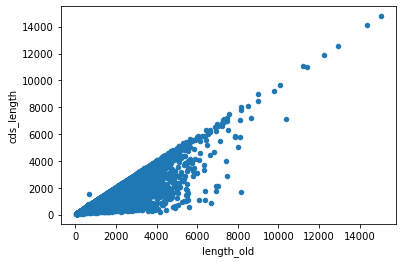

In [111]:
#l_df.plot.scatter(x = 'count', y = sample_name, xlim=(0, 1000), ylim=(0, 1000))
#l_df.plot.scatter(x = 'length_parastou', y = 'length')
#l_df.plot.scatter(x = 'length_old', y = 'length')
l_df.plot.scatter(x = 'length_old', y = 'cds_length')

- Visualize `total_difference`: `scatter_plot`

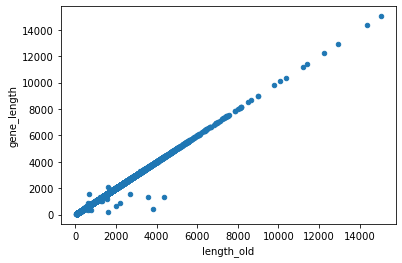

In [112]:
#l_df.plot.scatter(x = 'count', y = sample_name, xlim=(0, 1000), ylim=(0, 1000))
#l_df.plot.scatter(x = 'length_parastou', y = 'length')
#l_df.plot.scatter(x = 'length_old', y = 'length')
l_df.plot.scatter(x = 'length_old', y = 'gene_length')

## Alternative: compute lengths using `htseq`

In [113]:
# import HTSeq

# # A GFF_Reader parses a GFF file and presents its content as
# # a sequence of 'GenomicFeature' objects.
# gff_file = HTSeq.GFF_Reader(os.path.join(annot_dir, 'schizosaccharomyces_pombe.chr.extended.gff3'))

# # The following dict will store, for each `transcript`, a list of it's `exons`:
# transcript_dict = {}

# # Go through the GFF file and look for all exons:
# for feature in gff_file:
    
#     # 'feature' is an HTSeq.GenomicFeature object, which describes a
#     # line in the GFF file. It has several slots, for example, 'iv'
#     # for the interval (where it is on the genome), 'type' for its
#     # type (3rd column in the GFF file) and 'attr' for the
#     # attributes (last column)
    
#     # We are only interested in lines describing exons:
#     if feature.type == "exon":
        
#         # In this GFF file, the ID of the transcript to which the exons
#         # belongs is stored in an attribute (i.e., something in the 9th
#         # column) called "Parent"
#         transcript_id = feature.attr['Parent']
        
#         # Is this the first time we see this transcript?
#         if transcript_id not in transcript_dict:
            
#             # If so, add to the 'transcripts' dict an empty list 
#             # store store the exons in
#             transcript_dict[ transcript_id ] = list()

#         # Add the exon to the list
#         transcript_dict[ transcript_id ].append( feature )
    

In [114]:
# # Now, go through the transcripts and calculate the length of each
# # by adding up the lengths of its exons
# for transcript_id in sorted( transcript_dict ):
    
#     transcript_length = 0
#     # Go through the GenomicFeature
#     for exon in transcript_dict[ transcript_id ]:
        
#         # Each GenomicFeature object has a slot called 'iv', which is a
#         # GenomicInterval object, which in turn contains slots such as
#         # 'chrom', 'start', 'end', 'strand', 'length', etc., to describe
#         # where the feature sits in the genome. We use 'length' here.
#         transcript_length += exon.iv.length + 1
#         # We add the 1 because this GFF file does no
#         # Now, 'transcript_length' is the sum of the lengths of all the
#         # transcripts exon.
        
#     # Print this result, and also add the number of exons.
#     # This is just the length of the list of exons for the transcript):
#     #print(transcript_id, transcript_length, len( transcripts[ transcript_id ] ))

In [115]:
#transcript_dict